In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, BasicAer, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import math as m

In [2]:
def from_even(qc, qr, coin):
    N = len(qr)
    qc.h(coin)
    qc.x(qr[0])
    for i in range(N-2, 0, -1):
        ctrls = []
        for j in range(1, i): ctrls.append(j)
        ctrls.append(coin)
        qc.mcx(ctrls, qr[i])
    ctrls = []
    for i in range(1, N-1): ctrls.append(qr[i])
    ctrls.append(coin)
    qc.mcx(ctrls, qr[N-1])

def from_odd(qc, qr, coin):
    N = len(qr)
    qc.h(coin)
    qc.x(coin)
    qc.x(qr[0])

    ctrls = []
    for i in range(1, N-1): ctrls.append(qr[i])
    ctrls.append(coin)
    qc.mcx(ctrls, qr[N-1])
    for i in range(1, N-1):
        ctrls = []
        for j in range(1, i): ctrls.append(j)
        ctrls.append(coin)
        qc.mcx(ctrls, qr[i])
    qc.x(coin)

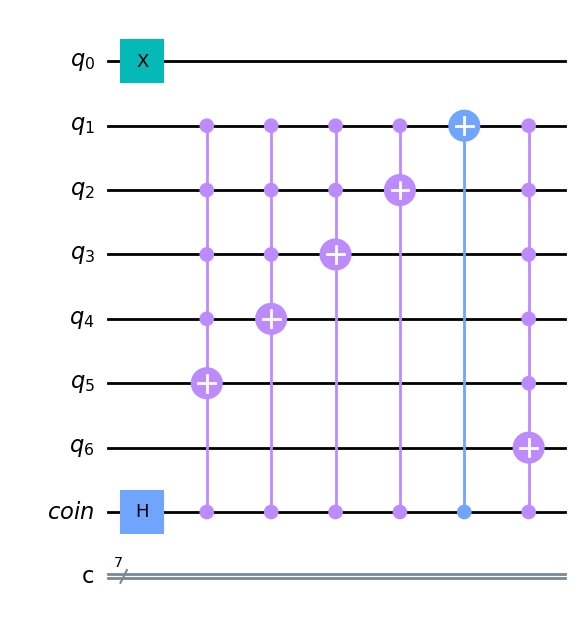

In [22]:
N = 7
qr, coin, cr = QuantumRegister(N, 'q'), QuantumRegister(1, 'coin'), ClassicalRegister(N, 'c')
qce = QuantumCircuit(qr, coin, cr)
from_even(qce, qr, coin)
qce.draw('mpl', style='clifford')

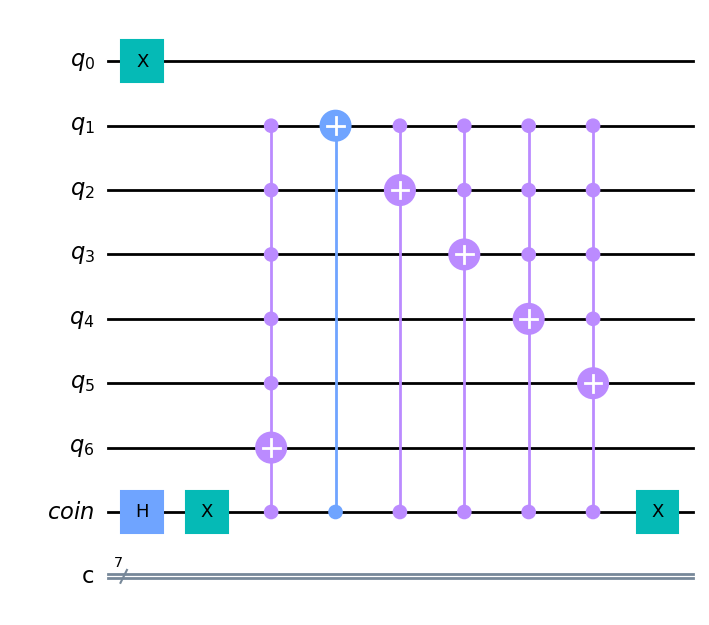

In [23]:
qco = QuantumCircuit(qr, coin, cr)
from_odd(qco, qr, coin)
qco.draw('mpl', style='clifford')

In [27]:
label = '0'
for i in range(N): label += '0'
print(label)
v = Statevector.from_label(label)
d = {}
for i in range(((2**N-1)//2)):
    d = {}
    if i%2 == 0:
        v = v.evolve(qce)
    else:
        v = v.evolve(qco) 
    x = v.to_dict()
    # print(f"x: {x}, d: {d}")
    for key, value in x.items():
        if abs(value) > 1e-10: d[key[1:]] = value
    print(f'After {i+1} toss(es): {len(d)} states')
    # print(d)
# d

00000000
After 1 toss(es): 2 states
After 2 toss(es): 3 states
After 3 toss(es): 4 states
After 4 toss(es): 5 states
After 5 toss(es): 6 states
After 6 toss(es): 7 states
After 7 toss(es): 8 states
After 8 toss(es): 9 states
After 9 toss(es): 10 states
After 10 toss(es): 11 states
After 11 toss(es): 12 states
After 12 toss(es): 13 states
After 13 toss(es): 14 states
After 14 toss(es): 15 states
After 15 toss(es): 16 states
After 16 toss(es): 17 states
After 17 toss(es): 18 states
After 18 toss(es): 19 states
After 19 toss(es): 20 states
After 20 toss(es): 21 states
After 21 toss(es): 22 states
After 22 toss(es): 23 states
After 23 toss(es): 24 states
After 24 toss(es): 25 states
After 25 toss(es): 26 states
After 26 toss(es): 27 states
After 27 toss(es): 28 states
After 28 toss(es): 29 states
After 29 toss(es): 30 states
After 30 toss(es): 31 states
After 31 toss(es): 32 states
After 32 toss(es): 33 states
After 33 toss(es): 34 states
After 34 toss(es): 35 states
After 35 toss(es): 36 